<a href="https://colab.research.google.com/github/satya-ctrl/Ai-powered-E-commerce-platform/blob/main/Deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #2. UNZIP YOUR DATASET FROM GOOGLE DRIVE
# =====================================================
# CHANGE THIS ONLY → replace deepfake_dataset.zip with your actual file name
zip_path = "/content/drive/MyDrive/Dataset.zip"

!unzip -q "{zip_path}" -d "/content/dataset"

print("Dataset extracted!")

Dataset extracted!


In [ ]:
#3. SET DATASET DIRECTORY PATHS
# =====================================================
train_dir = "/content/dataset/Dataset/Train"
val_dir   = "/content/dataset/Dataset/Validation"
test_dir  = "/content/dataset/Dataset/Test"

# Image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [ ]:
!find /content/dataset -maxdepth 3 -type d


/content/dataset
/content/dataset/Dataset
/content/dataset/Dataset/Validation
/content/dataset/Dataset/Validation/Fake
/content/dataset/Dataset/Validation/Real
/content/dataset/Dataset/Test
/content/dataset/Dataset/Test/Fake
/content/dataset/Dataset/Test/Real
/content/dataset/Dataset/Train
/content/dataset/Dataset/Train/Fake
/content/dataset/Dataset/Train/Real


In [ ]:
!ls -R /content/dataset


Streaming output truncated to the last 5000 lines.
fake_12600.jpg	fake_16137.jpg	fake_1997.jpg	fake_5532.jpg  fake_9069.jpg
fake_12601.jpg	fake_16138.jpg	fake_1998.jpg	fake_5533.jpg  fake_906.jpg
fake_12602.jpg	fake_16139.jpg	fake_1999.jpg	fake_5534.jpg  fake_9070.jpg
fake_12603.jpg	fake_1613.jpg	fake_199.jpg	fake_5535.jpg  fake_9071.jpg
fake_12604.jpg	fake_16140.jpg	fake_19.jpg	fake_5536.jpg  fake_9072.jpg
fake_12605.jpg	fake_16141.jpg	fake_1.jpg	fake_5537.jpg  fake_9073.jpg
fake_12606.jpg	fake_16142.jpg	fake_2000.jpg	fake_5538.jpg  fake_9074.jpg
fake_12607.jpg	fake_16143.jpg	fake_2001.jpg	fake_5539.jpg  fake_9075.jpg
fake_12608.jpg	fake_16144.jpg	fake_2002.jpg	fake_553.jpg   fake_9076.jpg
fake_12609.jpg	fake_16145.jpg	fake_2003.jpg	fake_5540.jpg  fake_9077.jpg
fake_1260.jpg	fake_16146.jpg	fake_2004.jpg	fake_5541.jpg  fake_9078.jpg
fake_12610.jpg	fake_16147.jpg	fake_2005.jpg	fake_5542.jpg  fake_9079.jpg
fake_12611.jpg	fake_16148.jpg	fake_2006.jpg	fake_5543.jpg  fake_907.jpg
fake_12612

In [ ]:
#4. IMPORT LIBRARIES
# =====================================================
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# 5. DATA GENERATORS
# =====================================================
datagen = ImageDataGenerator(rescale=1/255.)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [ ]:
# 6. BUILD THE DEEPFAKE DETECTION MODEL
# =====================================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.0001),
    metrics=['accuracy']
)

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,289 (24.86 MB)

 Trainable params: 6,516,289 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 7. TRAIN THE MODEL
# =====================================================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 220s 49ms/step - accuracy: 0.7921 - loss: 0.4296 - val_accuracy: 0.8924 - val_loss: 0.2540
Epoch 2/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 185s 42ms/step - accuracy: 0.9256 - loss: 0.1798 - val_accuracy: 0.9176 - val_loss: 0.2000
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 185s 42ms/step - accuracy: 0.9509 - loss: 0.1232 - val_accuracy: 0.9347 - val_loss: 0.1635
Epoch 4/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 181s 41ms/step - accuracy: 0.9631 - loss: 0.0946 - val_accuracy: 0.9024 - val_loss: 0.2600
Epoch 5/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 179s 41ms/step - accuracy: 0.9693 - loss: 0.0771 - val_accuracy: 0.9285 - val_loss: 0.1915
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 178s 41ms/step - accuracy: 0.9761 - loss: 0.0604 - val_accuracy: 0.9325 - val_loss: 0.2083
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 174s 40ms/step - accuracy: 0.9816 - loss: 0.0474 - val_accuracy: 0.9460 - val_loss: 0.1570
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 179s 41ms/step - accuracy: 

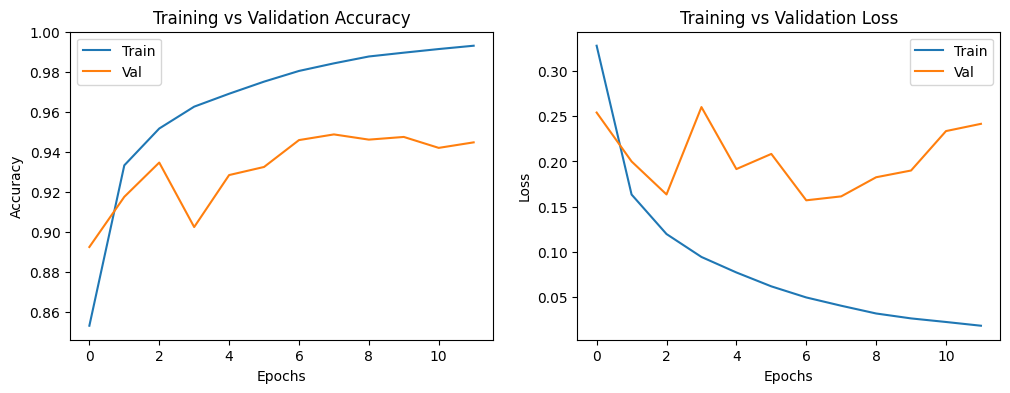

In [ ]:
# 8. TRAINING GRAPHS
# =====================================================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'])

plt.show()


341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step


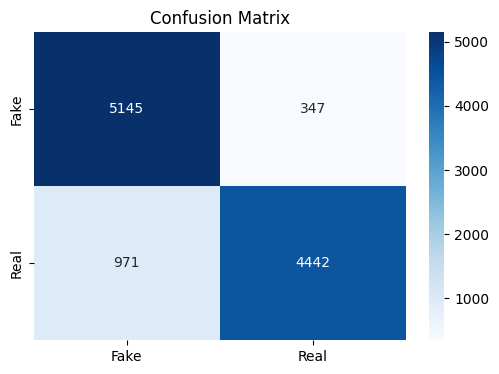

                  Fake         Real  accuracy     macro avg  weighted avg
precision     0.841236     0.927542  0.879138      0.884389      0.884077
recall        0.936817     0.820617  0.879138      0.878717      0.879138
f1-score      0.886458     0.870810  0.879138      0.878634      0.878690
support    5492.000000  5413.000000  0.879138  10905.000000  10905.000000


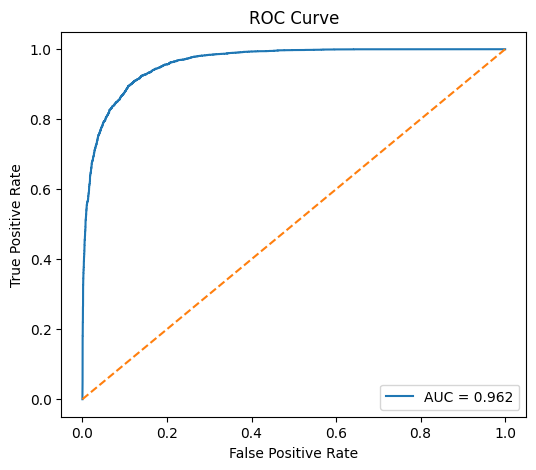

In [ ]:
# 9. EVALUATION ON TEST SET
# =====================================================
pred_prob = model.predict(test_gen)
pred_class = (pred_prob > 0.5).astype('int')

true_labels = test_gen.classes
class_labels = list(test_gen.class_indices.keys())


# CONFUSION MATRIX
cm = confusion_matrix(true_labels, pred_class)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.show()


# CLASSIFICATION REPORT
report = classification_report(true_labels, pred_class, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report)
print(df_report)


# ROC CURVE
fpr, tpr, thresholds = roc_curve(true_labels, pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
# 10. SAVE METRICS TO EXCEL
# =====================================================
excel_data = {
    "Metric": ["Accuracy",
               "Precision_real", "Recall_real", "F1_real",
               "Precision_fake", "Recall_fake", "F1_fake",
               "AUC"],

    "Value": [
        report['accuracy'],
        report['Real']['precision'],
        report['Real']['recall'],
        report['Real']['f1-score'],
        report['Fake']['precision'],
        report['Fake']['recall'],
        report['Fake']['f1-score'],
        roc_auc
    ]
}

df_excel = pd.DataFrame(excel_data)
df_excel.to_excel("deepfake_evaluation.xlsx", index=False)

print("Excel file saved as deepfake_evaluation.xlsx")

Excel file saved as deepfake_evaluation.xlsx


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def predict_image(img_path):
    img = cv2.imread(img_path)

    if img is None:
        print(" Error: Cannot load image:", img_path)
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (128,128))
    img_array = img_resized.astype('float32') / 255.
    img_array = np.expand_dims(img_array, axis=0)

    # prediction
    prob = model.predict(img_array)[0][0]

    if prob > 0.5:
        label = "FAKE"
        confidence = prob * 100
    else:
        label = "REAL"
        confidence = (1 - prob) * 100

    print(f"\nPrediction: {label}")
    print(f"Confidence: {confidence:.2f}%")

    # Show image
    cv2_imshow(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step

Prediction: REAL
Confidence: 98.14%


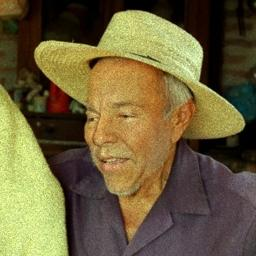

In [ ]:
predict_image("/content/dataset/Dataset/Test/Fake/fake_1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction: REAL
Confidence: 80.07%


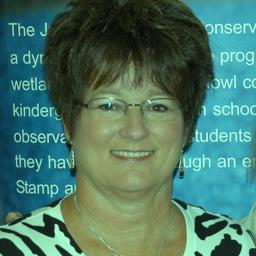

In [ ]:
predict_image("/content/dataset/Dataset/Test/Real/real_10.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Prediction: FAKE
Confidence: 100.00%


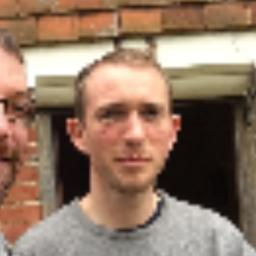

In [ ]:
predict_image("/content/dataset/Dataset/Test/Real/real_41.jpg")

In [ ]:
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
predict_image("")


 Error: Cannot load image: 
